<a href="https://colab.research.google.com/github/abhay0603/-Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Customer Churn Prediction

## Overview

The Bank Customer Churn Prediction project aims to develop a machine learning model that can predict whether a bank customer is likely to churn or not. Customer churn, also known as customer attrition, is when customers stop doing business with a company. Identifying customers who are likely to churn beforehand can help the bank take proactive measures to retain them, such as offering them better services or incentives.



##Objective

The main objective of this project is to develop a predictive model that can accurately identify customers who are likely to churn. By analyzing historical customer data, the model will be trained to recognize patterns and factors that indicate a customer is at risk of leaving the bank. The ultimate goal is to help the bank reduce customer churn by implementing targeted retention strategies for at-risk customers.



## Importing the Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [179]:
dataset = pd.read_csv('bank Churn Modeling.csv')
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values


## Encoding Categorical Data

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])

## Spiliting the dataset into the Training set and Testing set

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##Feature Scaling

In [182]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##Training Random Forest Model on training set

In [183]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

##Predicting

In [184]:
y_pred = classifier.predict(X_test)

In [185]:
y_train_pred = classifier.predict(X_train)

## Evaluation

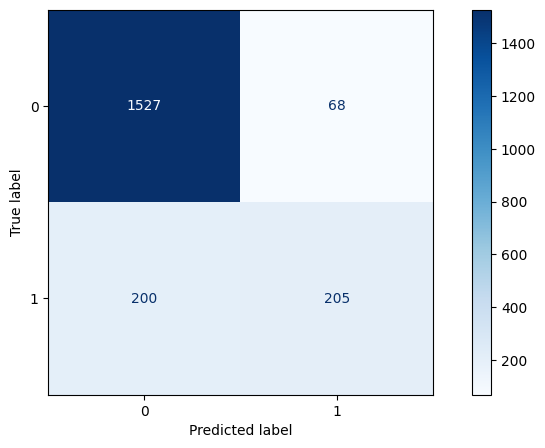

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test,y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
fig, ax = plt.subplots(figsize=(10,5))
matrix.plot(cmap=plt.cm.Blues, ax=ax);

In [187]:
accuracy_score(y_train,y_train_pred)

1.0

In [188]:
accuracy_score(y_test,y_pred)

0.866

In [189]:
from sklearn.metrics import classification_report
print('*********************************************************************')
print(classification_report(y_test, y_pred))

*********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

